# Exercises

There are three exercises in this notebook:

1. Use the cross-validation method to test the linear regression with different $\alpha$ values, at least three.
2. Implement based on the Ridge regression example, the Lasso regression.
3. Extend the Fisher's classifier to work with two features. Use the class as the $y$.

## 1. Cross-validation linear regression

You need to change the variable ``alpha`` to be a list of alphas. Next do a loop and finally compare the results.

In [373]:
import numpy as np
from sklearn.metrics import mean_squared_error

x = np.array([188, 181, 197, 168, 167, 187, 178, 194, 140, 176, 168, 192, 173, 142, 176]).reshape(-1, 1).reshape(15,1)
y = np.array([141, 106, 149, 59, 79, 136, 65, 136, 52, 87, 115, 140, 82, 69, 121]).reshape(-1, 1).reshape(15,1)
x = np.asmatrix(np.c_[np.ones((15,1)),x])
I = np.identity(2)
alpha = np.array([0.1,1,10]) #updated alpha








We will do this in two ways: coding from scratch and using sklearn. First, we will perform a Leave-One-Out cross-validation from scratch:

In [374]:
cve=[] #list to store cross-validation errors for each alpha

for i in range(len(alpha)): #we run the code given for each value of alpha
    
    mse=0 #mean squared error
    
    # We are performing Leave-One-Out cross-validation, so every time the next loop runs, we will take out the j-th value of
    #x and y and use it as the test set (and the rest, of course, as train set):
    
    for j in range(len(x)): 
                            
     xdel = np.delete(x,j,0)
     ydel = np.delete(y,j,0)
     w = np.linalg.inv(xdel.T*xdel + alpha[i] * I)*xdel.T*ydel
     mse += mean_squared_error(y[j],w[1][0]*x[j,1]+w[0][0]) # we add all the mse of each fit, and after the loop is finished
                                                            #we take the average, which is the cross-validation error
    cve.append(mse/len(x))

print("According to the code from the scratch, the best alpha is:", alpha[np.argmin(cve)])



According to the code from the scratch, the best alpha is: 0.1


We can use RidgeCV from sklearn and see what we obtain:

In [375]:
from sklearn.linear_model import RidgeCV
clf = RidgeCV(alphas=alpha,cv=15).fit(x, y)


C:\Users\jackt\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\jackt\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\jackt\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\jackt\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\jackt\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg,

In [376]:
print("According to RidgeCV, the best alpha is:",clf.alpha_)

According to RidgeCV, the best alpha is: 0.1


And we obtain the same result.

If we wanted the weight for this alpha, we can just code the following:

In [377]:
 w = np.linalg.inv(x.T*x + 0.1* I)*x.T*y
 print("The coefficients for alph a= 0.1 are:", w.ravel())

The coefficients for alph a= 0.1 are: [[-101.72397081    1.16978757]]


## 2. Implement based on the Ridge regression example, the Lasso regression.

You need only update the compare the results with the sklearn results. You should get
[1.61776499, -180.8579086].

In [332]:
x = np.array([188, 181, 197, 168, 167, 187, 178, 194, 140, 176, 168, 192, 173, 142, 176]).reshape(-1, 1).reshape(15,1)
y = np.array([141, 106, 149, 59, 79, 136, 65, 136, 52, 87, 115, 140, 82, 69, 121]).reshape(-1, 1).reshape(15,1)

x = np.asmatrix(np.c_[np.ones((15,1)),x])

I = np.identity(2)
alpha = 0.1 


#I tried to find an expression for w like the one we have for the Ridge regression: https://mlweb.loria.fr/book/en/lasso.html 
# (bottom of the page). I think that in this case it is not possible to use it, or at least I don't get the expected result.
# On the other hand, I don't know how I could apply gradient descent in one line to obtain the weights.

from sklearn.linear_model import Lasso

lasso_regression = Lasso(alpha=alpha).fit(x,y)
lasso_regression.coef_,lasso_regression.intercept_ 



#To be honest, I don't know why the 0 appears.

(array([0.        , 1.61776499]), array([-180.8579086]))

## 3. Extend the Fisher's classifier

Please extend the targets of the ``iris_data`` variable and use it as the $y$.

In [358]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris_data = load_iris()
iris_df = pd.DataFrame(iris_data.data,columns=iris_data.feature_names)
iris_df.head()

# We expand with a new feature:


x_1 = iris_df['sepal width (cm)'].values # change here
x_2 = iris_df['sepal length (cm)'].values
y = iris_df['petal length (cm)'].values # change here


dataset_size = np.size(x_1)

mean_x_1, mean_x_2, mean_y = np.mean(x_1),np.mean(x_2),np.mean(y)

SS_x1y = np.sum(y * x_1) - dataset_size * mean_y * mean_x_1
SS_x2y = np.sum(y * x_2) - dataset_size * mean_y * mean_x_2
SS_x1x1 = np.sum(x_1 * x_1) - dataset_size * mean_x_1 * mean_x_1
SS_x2x2 = np.sum(x_2 * x_2) - dataset_size * mean_x_2 * mean_x_2

a_1 = SS_x1y / SS_x1x1
a_2 = SS_x2y/SS_x2x2   
       
b = mean_y - a_1 * mean_x_1 - a_2 * mean_x_2


print("Coefficient a_1:", a_1)
print("Coefficient a_2:",a_2)
print("Coefficient b:", b)










Coefficient a_1: -1.7352215240553945
Coefficient a_2: 1.8584329782548417
Coefficient b: -1.7962927633904329


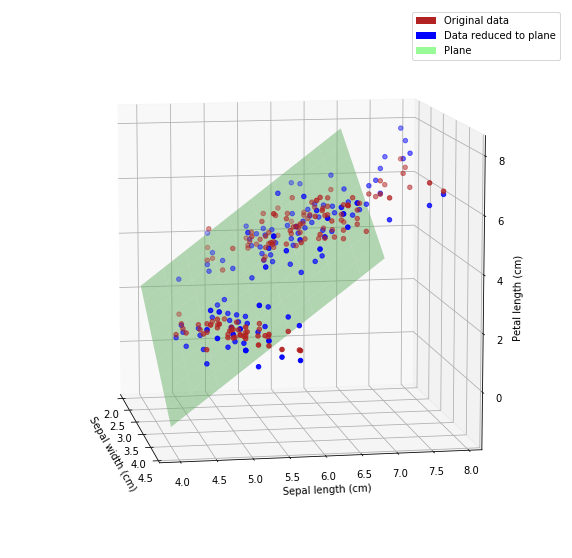

In [370]:
from mpl_toolkits.mplot3d import Axes3D

#Preparing the data for the plot of the plane with the obtained coefficients:

D = 10
x_1_plain = np.linspace(int(min(x_1)),int(max(x_1)),D)
x_2_plain = np.linspace(int(min(x_2)),int(max(x_2)),D)
X_1,X_2 = np.meshgrid(x_1_plain, x_2_plain)

y_pred_plain = np.zeros((D,D))

for i in range(D):
    for j in range(D):
        y_pred_plain[i,j] = a_1 * X_1[i,j]+ a_2 * X_2[i,j] + b

#Predicted values for y:

y_pred_points=np.zeros(len(x_1))

for i in range(len(x_1)):
    y_pred_points[i]=a_1 * x_1[i] + a_2 * x_2[i] + b

#3D Plot:

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(x_1, x_2,y,label="Original data", c = 'firebrick')
ax.scatter(x_1, x_2, y_pred_points,label="Data reduced to plane", color='blue')
ax.plot_surface(X_1, X_2, y_pred_plain,label="Plane", linewidth=0.2, color="palegreen", alpha=0.5)
ax.set_xlabel(u'Sepal width (cm)')
ax.set_ylabel(u'Sepal length (cm)')
ax.set_zlabel(u'Petal length (cm)')

f1 = plt.Rectangle((0, 0), 0.1, 0.1,fc='firebrick')
f2= plt.Rectangle((0, 0), 0.1, 0.1,fc='blue')
f3 = plt.Rectangle((0, 0), 0.1, 0.1,fc='palegreen')
ax.legend((f1,f2,f3),("Original data","Data reduced to plane","Plane"))

#Let's rotate the plot and save images while rotating 10 degrees every time:

for ii in range(0,360,10):
    ax.view_init(elev=10., azim=ii)
    plt.savefig("movie%d.png" % ii)


Now we can show some more images that we have saved. I checked all of them and selected some of the best (basically the ones in which we can see the points on the plane).

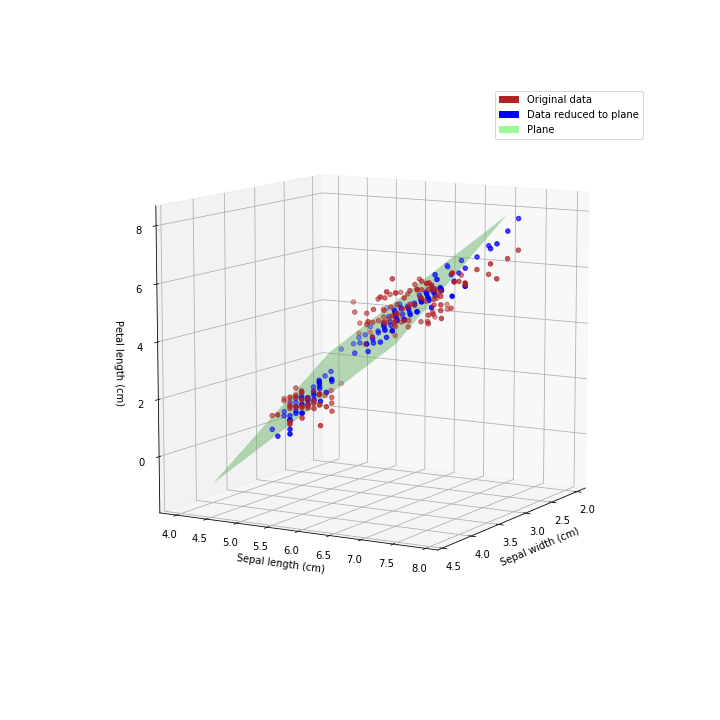

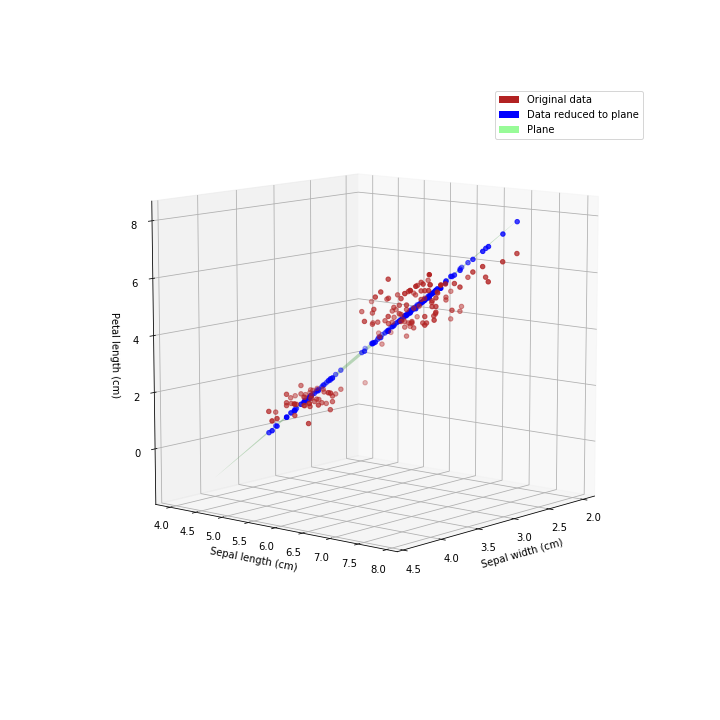

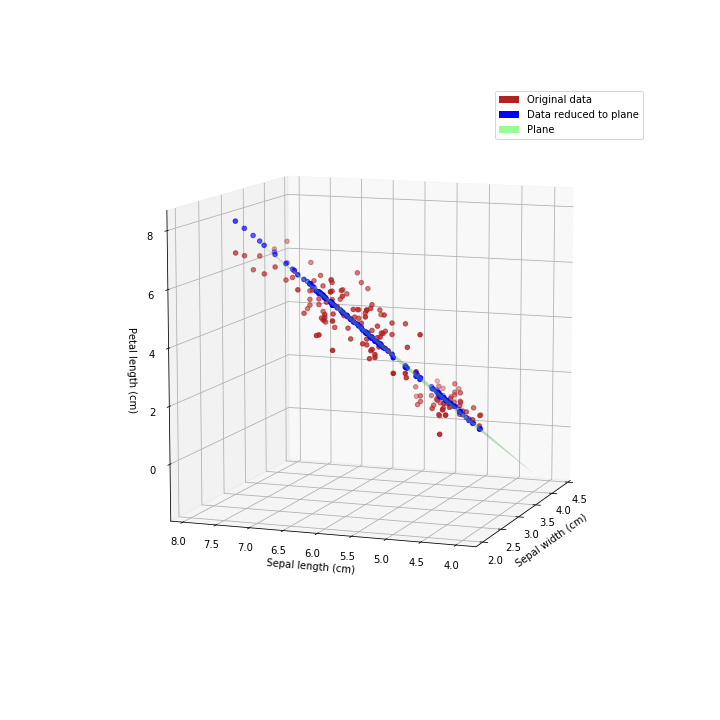

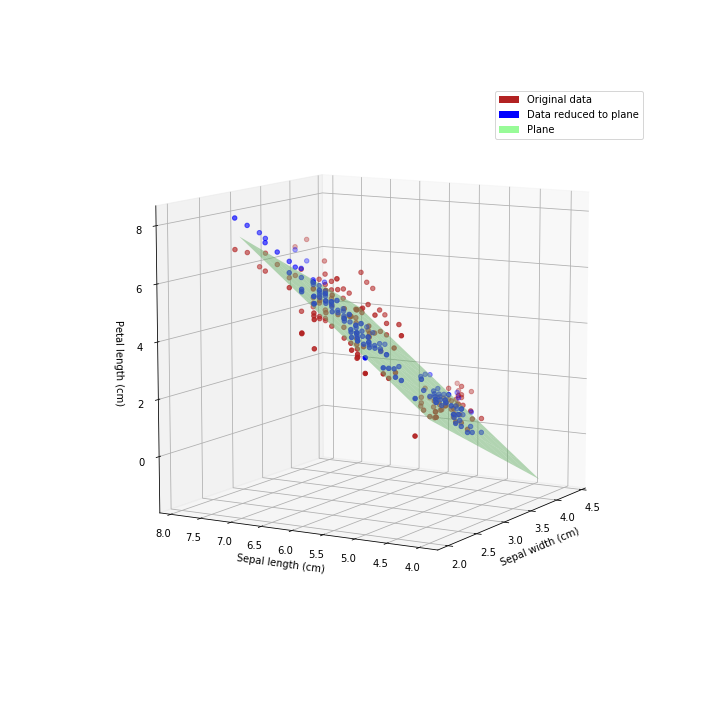

In [371]:
from IPython.display import Image

display(Image("movie30.png"),Image("movie40.png"),Image("movie200.png"),Image("movie210.png"))

